In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Session 4: Algorithm design and computational complexity

Ultimately, we want to be able to solve complex problems.

The skill we want to work on today is breaking a problem down into tractable chunks - this is called **abstraction**.

Today we want to look at:
- How to start thinking about algorithm design
- Use of flowcharts to describe processes
- Writing pseudocode to describe processes
- How you might evaluate the performance of an algorithm

With respect to efficiency, there are two main considerations:
- Time Complexity: How long does it take to run?
- Space Complexity: How much memory does it use?

We will address these last 2 points first!

---

# Part 1 (Session 4): Why use functions? And how are they documented? (15 min)

- Define once !!!
- Use many times

Let's define a function

In [7]:
def leastSquaresDistance(x1,y1,x2,y2):
    """This is a function to return the least squares disance between 2 points
    ARGS:
        x1,y1 (float, float): Coordinate of first point
        x2,y2 (float, float): Coordinate of second point
    RETURN: 
        r (float): least squared distance
    """
    
    r = np.sqrt( (x1-x2)*(x1-x2) + (y1-y2)*(y1-y2) )
    return r
    

## 1.1 DEFINE ONCE AND USE MANY TIMES

- If you make a mistake in the function, you only need to modify it in one place and rerun !!!

And use it a couple of times...

In [8]:
print( leastSquaresDistance(1,3,2,5) )
print( leastSquaresDistance(-1,30,22,15) )

2.23606797749979
27.459060435491963


And again...

In [9]:
print( leastSquaresDistance(101,3,122,115) )

113.95174417269794


---

## 1.2 Reading the help pages

For the function we just defined, we can access the help information using the command below:

In [10]:
?leastSquaresDistance

If we use two question marks - we can see the actual function definition aswell.

In [11]:
??leastSquaresDistance

We can to exactly the same to access the help for any functions defined in Python

- Compare the api for `np.minimum`: https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.minimum.html#numpy.minimum
- And run the command below.
- How similar are the descriptions?

In [12]:
?np.minimum

## 1.3 SOME MATHEMATICAL OPERATIONS ARE SLOWER THAN OTHER

- Compare $a^2$ vs $\sqrt{a}$
- Your intuition wont be far off for common ones...

### Example: Particles in a box

- To simulate the particles in a box we need to identify when they collide
- It will be helpful to keep track of nearest neighbours
- We could adapt the code above to find the distance between particles
- BUT if we are only interested in finding the nearest neighbours...
- ... don't bother taking the square root of the distance! Will save time.

<img src="https://i.stack.imgur.com/3E0Ak.gif">


### QUICK ASIDE:
- **QUESTION: How did I format the equation like that?**
- **QUESTION: How did I format the bullet points?**
- **QUESTION: Where have I sources the animation from?**

---

## 1.4 EXAMPLE: Finding the slopes on a map

**EXERCISE:**

Look in the directory either by:
- looking back at the Jupyter tab in your browser that you launched this notebook from
- or, but opening a new cell and running `! ls`. 
    - `!` tells iPython to run what follows on the command-line
    - `ls` is the Linux command to list what is in the current directory.

You will see a file called "ArthursSeat.txt" in the same directory as this notebook.

**EXERCISE:**
- Look at this page I found by googling "load txt file numpy": https://stackoverflow.com/questions/42857861/load-txt-file-into-numpy-array
- Work out how to load the file and let's look at some basic information:

In [ ]:
# Let's load the elevation data
z = ...

print( z.shape )
print( type(z) )
print( z.dtype )

In [3]:
##ANSWER
# Let's load the elevation data
z = np.loadtxt('ArthursSeat.txt')

print( z.shape )
print( type(z) )
print( z.dtype )

(800, 800)
<class 'numpy.ndarray'>
float64


**EXERCISE:** The command below should plot the topography of Arthur's Seat.
- Try turning some of the commented out options to see how they change the plot

Text(0.5,1,'Arthurs seat elevation')

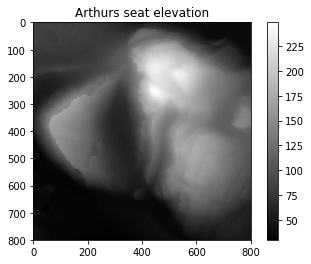

In [4]:
plt.imshow(z, cmap='gray')
# plt.imshow(z, cmap='gray', extent=[0,1600,0,1600] )

cbar = plt.colorbar(shrink=1)
# cbar.set_label('Elevation (m)')
# cbar.set_ticks([50,100,150,200])

plt.title('Arthurs seat elevation')

- Compare this with the [google map image of Arthur's Seat](https://www.google.com/maps/place/Arthur's+Seat/@55.9463749,-3.1682166,2108m/data=!3m1!1e3!4m5!3m4!1s0x4887b884112f22b9:0x218a466c41934f0!8m2!3d55.9440825!4d-3.1618324)
- QUESTION: Does this image of Arthur's Seat look right?
    - What is wrong?
- Read through this StackOverflow Post https://stackoverflow.com/questions/14320159/matplotlib-imshow-data-rotated
    - Can you work out how to fix it?


Text(0.5,1,'Arthurs seat elevation')

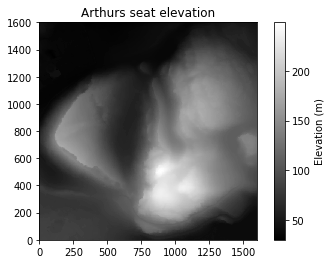

In [9]:
z = np.loadtxt('ArthursSeat.txt')

# this means we now write to figure 1 when we plot
plt.imshow(z, origin='lower', cmap='gray', extent=[0,1600,0,1600] )

cbar = plt.colorbar(shrink=1)
cbar.set_label('Elevation (m)')
cbar.set_ticks([50,100,150,200])
plt.title('Arthurs seat elevation')

Now that we have the image orientated - we want to write a function that extracts the EW and NS grandients.

- We will discuss how to do this as a group.
- Then replace the `...` below to create you gradient function.

In [ ]:
def calcGradient( ..., ... ):
    dz_dx = ( ... - ... ) / (...)
    dz_dy = ( ... - ... ) /(...)
    return ..., ...

In [10]:
### ANSWER
def calcGradient( topo, dx ):
    dz_dx = ( topo[ : , 2: ] - topo[ : , :-2 ] ) / (2*dx)
    
    dz_dy = ( topo[ 2: , : ] - topo[ :-2 , : ] ) /(2*dx)
    return dz_dx, dz_dy

This is your first example of numerical differentiation!
- i.e. how to find gradients of discrete data
- When we solve differential equations later in the course we will be going the other way

Plot the results of your gradient function:

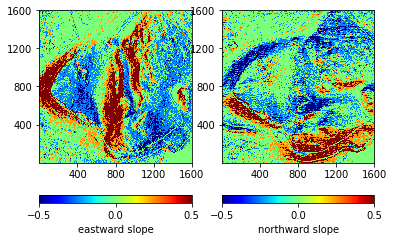

In [11]:
dz_dx, dz_dy = calcGradient(z, 2)

plt.subplot(1,2,1)
plt.imshow(dz_dx,origin='lower',cmap='jet',extent=[0,1600,0,1600],vmin=-.5,vmax=.5)
cbar = plt.colorbar(shrink=1,orientation='horizontal')
plt.xticks(range(400,2000,400))
plt.yticks(range(400,2000,400))
cbar.set_label('eastward slope')
cbar.set_ticks([-.5,0,.5])

plt.subplot(1,2,2)
plt.imshow(dz_dy,origin='lower',cmap='jet',extent=[0,1600,0,1600],vmin=-.5,vmax=.5)
cbar = plt.colorbar(shrink=1,orientation='horizontal')
plt.xticks(range(400,2000,400))
plt.yticks(range(400,2000,400))
cbar.set_label('northward slope')
cbar.set_ticks([-.5,0,.5])

Plot the results of the numpy gradient function:

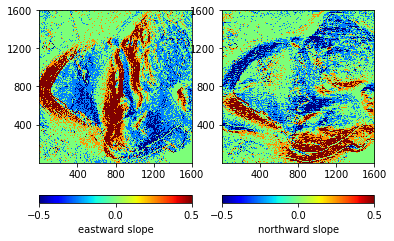

In [12]:
dz_dy, dz_dx  = np.gradient(z, 2)

plt.subplot(1,2,1)
plt.imshow(dz_dx,origin='lower',cmap='jet',extent=[0,1600,0,1600],vmin=-.5,vmax=.5)
cbar = plt.colorbar(shrink=1,orientation='horizontal')
plt.xticks(range(400,2000,400))
plt.yticks(range(400,2000,400))
cbar.set_label('eastward slope')
cbar.set_ticks([-.5,0,.5])

plt.subplot(1,2,2)
plt.imshow(dz_dy,origin='lower',cmap='jet',extent=[0,1600,0,1600],vmin=-.5,vmax=.5)
cbar = plt.colorbar(shrink=1,orientation='horizontal')
plt.xticks(range(400,2000,400))
plt.yticks(range(400,2000,400))
cbar.set_label('northward slope')
cbar.set_ticks([-.5,0,.5])


- Is your answer identical? 
- Is it similar?
- Can you suggest why?
- Do you need to know how the Numpy Gradient function works to use it?


Let's look at a row of elevation data
- What is the resolution like?
- Can you see why our function did not look as good?

[85. 85. 85. 86. 86. 85. 85. 86. 86. 85. 85. 85. 85. 85. 85. 85. 85. 85.
 85. 85. 85. 85. 85. 85. 85. 85. 85. 85. 85. 85. 84. 84. 83. 83. 83. 83.
 84. 84. 84. 84. 84. 84. 84. 84. 83. 83. 83. 83. 83. 83. 83. 83. 83. 83.
 82. 82. 83. 83. 83. 83. 83. 83. 83. 83. 83. 83. 83. 83. 83. 83. 83. 83.
 83. 83. 83. 83. 83. 84. 84. 85. 85. 85. 85. 85. 85. 85. 85. 85. 85. 85.
 85. 85. 85. 85. 85. 85. 85. 85. 85. 85.]


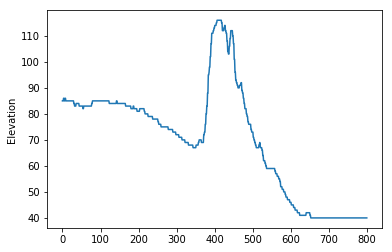

In [89]:
plt.plot(z[30])
plt.ylabel("Elevation")
print(z[30,:100])